In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combinations.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

632

In [6]:
cities

['hithadhoo',
 'bubaque',
 'san pedro de macoris',
 'port elizabeth',
 'kefamenanu',
 'rawson',
 'mataura',
 'qasigiannguit',
 'ulladulla',
 'grindavik',
 'port alfred',
 'samusu',
 'benguela',
 'castro',
 'ballina',
 'roald',
 'atuona',
 'ereymentau',
 'vaini',
 'tuatapere',
 'vaitupu',
 'la ronge',
 'arraial do cabo',
 'ribeira grande',
 'karratha',
 'san jose',
 'kahului',
 'albany',
 'carnaiba',
 'nikolskoye',
 'punta arenas',
 'illoqqortoormiut',
 'barrow',
 'avarua',
 'torbay',
 'clyde river',
 'yeppoon',
 'anadyr',
 'fortuna',
 'nizhneyansk',
 'yumen',
 'nouadhibou',
 'narsaq',
 'ambilobe',
 'veraval',
 'guelengdeng',
 'ancud',
 'kodiak',
 'kapaa',
 'cayenne',
 'belushya guba',
 'cape town',
 'khalkhal',
 'lillooet',
 'balimo',
 'busselton',
 'lebu',
 'codrington',
 'rikitea',
 'jijiga',
 'bluff',
 'avera',
 'riyadh',
 'shubarshi',
 'ushuaia',
 'quatre cocos',
 'severodvinsk',
 'seymchan',
 'san quintin',
 'zonalnoye',
 'pevek',
 'manado',
 'dauphin',
 'mar del plata',
 'jamesto

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print('Beginning Data Retrieval       ')
print('-------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ','+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass

# Indicate that Dat Loading is complete.
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | bubaque
Processing Record 3 of Set 1 | san pedro de macoris
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | kefamenanu
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | qasigiannguit
Processing Record 9 of Set 1 | ulladulla
Processing Record 10 of Set 1 | grindavik
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | samusu
City not found. Skipping...
Processing Record 13 of Set 1 | benguela
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | ballina
Processing Record 16 of Set 1 | roald
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | ereymentau
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Processing R

Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | tezu
Processing Record 40 of Set 4 | coquimbo
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | minab
Processing Record 43 of Set 4 | tagusao
Processing Record 44 of Set 4 | albenga
Processing Record 45 of Set 4 | inuvik
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | kibaek
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | pitkyaranta
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 5 | kostomuksha
Processing Record 3 of Set 5 | aden
Processing Record 4 of Set 5 | palafrugell
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | grootfontein
Processing Record 7 of Set 5 | constitucion
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | ust-kuyga
Processing Record 10 

Processing Record 32 of Set 8 | duz
City not found. Skipping...
Processing Record 33 of Set 8 | garavuti
Processing Record 34 of Set 8 | ciudad bolivar
Processing Record 35 of Set 8 | lugo
Processing Record 36 of Set 8 | ponta do sol
Processing Record 37 of Set 8 | taltal
Processing Record 38 of Set 8 | mogadishu
Processing Record 39 of Set 8 | mmabatho
Processing Record 40 of Set 8 | dibaya
City not found. Skipping...
Processing Record 41 of Set 8 | port hardy
Processing Record 42 of Set 8 | deh rawud
City not found. Skipping...
Processing Record 43 of Set 8 | atherton
Processing Record 44 of Set 8 | eregli
Processing Record 45 of Set 8 | talaya
Processing Record 46 of Set 8 | namibe
Processing Record 47 of Set 8 | sabalgarh
Processing Record 48 of Set 8 | yubileynyy
Processing Record 49 of Set 8 | sol-iletsk
Processing Record 50 of Set 8 | fare
Processing Record 1 of Set 9 | ukiah
Processing Record 2 of Set 9 | topolovgrad
Processing Record 3 of Set 9 | husavik
Processing Record 4 of

Processing Record 21 of Set 12 | burnie
Processing Record 22 of Set 12 | voyvozh
Processing Record 23 of Set 12 | togur
Processing Record 24 of Set 12 | egvekinot
Processing Record 25 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 26 of Set 12 | sigli
Processing Record 27 of Set 12 | nchelenge
Processing Record 28 of Set 12 | sao miguel do araguaia
Processing Record 29 of Set 12 | baybay
Processing Record 30 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 12 | san cristobal
Processing Record 32 of Set 12 | khormuj
City not found. Skipping...
Processing Record 33 of Set 12 | lakheri
Processing Record 34 of Set 12 | warqla
City not found. Skipping...
Processing Record 35 of Set 12 | gavle
Processing Record 36 of Set 12 | san juan
Processing Record 37 of Set 12 | padang
Processing Record 38 of Set 12 | concordia
Processing Record 39 of Set 12 | torrington
Processing Record 40 of Set 12 | meulaboh
Processing Record 41 of Set 12 |

In [11]:
len(city_data)

582

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,80.28,73,100,11.50,MV,2020-08-27 17:30:13
1,Bubaque,11.28,-15.83,80.71,78,84,11.63,GW,2020-08-27 17:30:13
2,San Pedro De Macoris,18.46,-69.30,91.40,62,40,4.70,DO,2020-08-27 17:28:14
3,Port Elizabeth,-33.92,25.57,59.00,72,0,10.29,ZA,2020-08-27 17:27:41
4,Kefamenanu,-9.45,124.48,65.95,80,56,2.91,ID,2020-08-27 17:30:14
5,Rawson,-43.30,-65.10,61.27,35,3,15.35,AR,2020-08-27 17:30:14
6,Mataura,-46.19,168.86,36.14,87,70,3.80,NZ,2020-08-27 17:30:14
7,Qasigiannguit,68.82,-51.19,44.60,65,75,5.82,GL,2020-08-27 17:30:14
8,Ulladulla,-35.35,150.47,53.01,66,40,14.99,AU,2020-08-27 17:30:14
9,Grindavik,63.84,-22.43,50.00,81,75,17.22,IS,2020-08-27 17:30:14


In [13]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2020-08-27 17:30:13,-0.60,73.08,80.28,73,100,11.50
1,Bubaque,GW,2020-08-27 17:30:13,11.28,-15.83,80.71,78,84,11.63
2,San Pedro De Macoris,DO,2020-08-27 17:28:14,18.46,-69.30,91.40,62,40,4.70
3,Port Elizabeth,ZA,2020-08-27 17:27:41,-33.92,25.57,59.00,72,0,10.29
4,Kefamenanu,ID,2020-08-27 17:30:14,-9.45,124.48,65.95,80,56,2.91
5,Rawson,AR,2020-08-27 17:30:14,-43.30,-65.10,61.27,35,3,15.35
6,Mataura,NZ,2020-08-27 17:30:14,-46.19,168.86,36.14,87,70,3.80
7,Qasigiannguit,GL,2020-08-27 17:30:14,68.82,-51.19,44.60,65,75,5.82
8,Ulladulla,AU,2020-08-27 17:30:14,-35.35,150.47,53.01,66,40,14.99
9,Grindavik,IS,2020-08-27 17:30:14,63.84,-22.43,50.00,81,75,17.22


In [15]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [17]:
# Import the time module:
import time

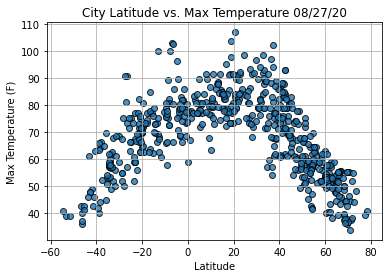

In [18]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

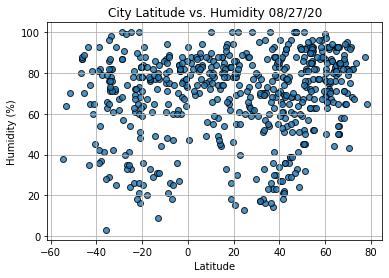

In [19]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

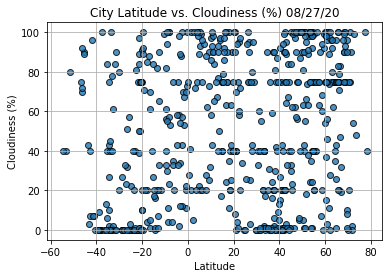

In [20]:
# Build the scatter plot for latitude vs cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

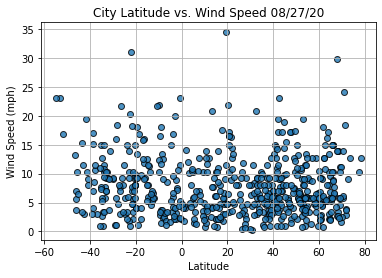

In [21]:
# Build the scatter plot for latitude vs Wind Speed.
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()

In [22]:
# Import linear regression from SciPy stats module
from scipy.stats import linregress

In [23]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equestion of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Loc method to get a specific row
index13 = city_data_df.loc[13]
index13

City                      Ballina
Country                        AU
Date          2020-08-27 17:30:15
Lat                        -28.87
Lng                        153.57
Max Temp                       55
Humidity                       87
Cloudiness                      0
Wind Speed                   1.12
Name: 13, dtype: object

In [25]:
# Filter based on value of a row
city_data_df['Lat'] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
577     True
578    False
579     True
580     True
581     True
Name: Lat, Length: 582, dtype: bool

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <= 0)]

In [27]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bubaque,GW,2020-08-27 17:30:13,11.28,-15.83,80.71,78,84,11.63
2,San Pedro De Macoris,DO,2020-08-27 17:28:14,18.46,-69.30,91.40,62,40,4.70
7,Qasigiannguit,GL,2020-08-27 17:30:14,68.82,-51.19,44.60,65,75,5.82
9,Grindavik,IS,2020-08-27 17:30:14,63.84,-22.43,50.00,81,75,17.22
14,Roald,NO,2020-08-27 17:30:15,62.58,6.13,59.00,67,96,14.99


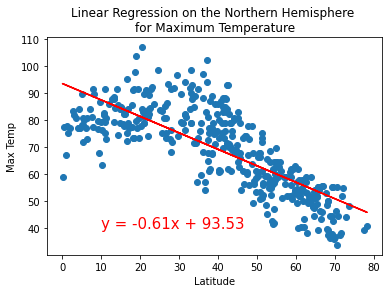

In [28]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for Maximum Temperature", 'Max Temp', (10,40))

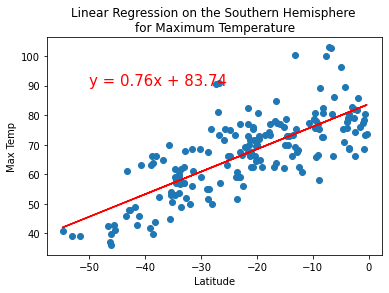

In [29]:
# Linear regression on the southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for Maximum Temperature", 'Max Temp', (-50,90))

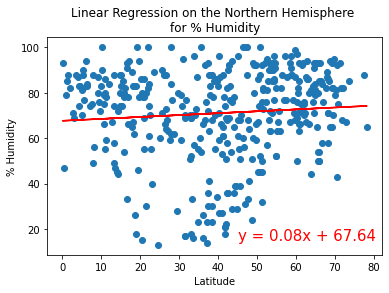

In [30]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for % Humidity", '% Humidity', (45,15))

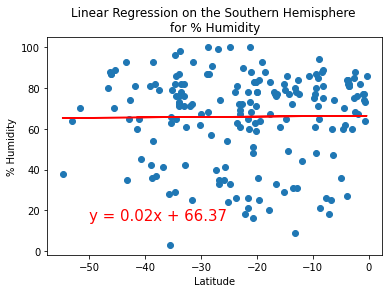

In [31]:
# Linear regression on the southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for % Humidity", '% Humidity', (-50,15))

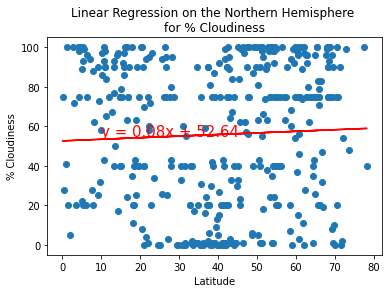

In [32]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for % Cloudiness", '% Cloudiness', (10,55))

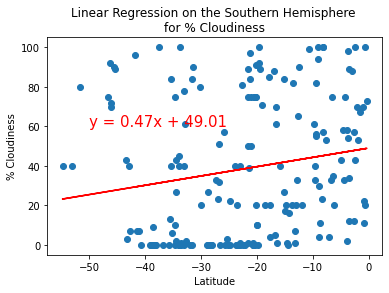

In [33]:
# Linear regression on the southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for % Cloudiness", '% Cloudiness', (-50,60))

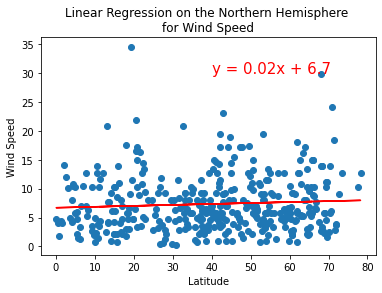

In [34]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for Wind Speed", 'Wind Speed', (40,30))

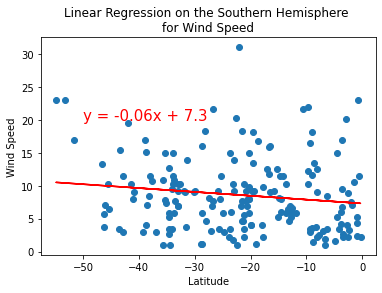

In [35]:
# Linear regression on the southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for Wind Speed", 'Wind Speed', (-50,20))